In [1]:
import re
import time
import datetime 
import operator
import numpy as np
import pandas as pd 
import collections
import unicodedata
import collections
import seaborn as sns
import collections
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from datetime import datetime, date, timedelta
from IPython.display import Image
%matplotlib inline

In [2]:
dengue_features_train = pd.read_csv('data/dengue_features_train.csv')
dengue_features_test = pd.read_csv('data/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('data/dengue_labels_train.csv')

In [3]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
dengue_features_train.shape

(1456, 24)

In [5]:
training_data = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [6]:
training_data.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
training_data.shape

(1456, 25)

(0, 0.09)

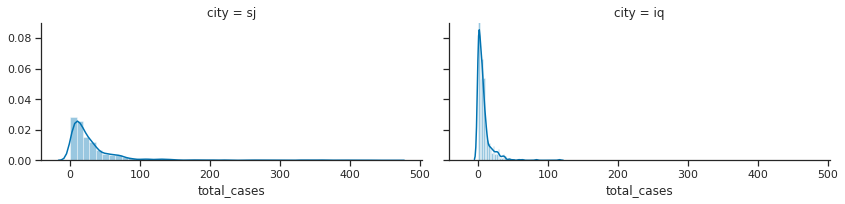

In [8]:
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(training_data, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

In [9]:
#Seperating the training data into two cities

training_data_sj = training_data[training_data.city == 'sj'].copy()
training_data_iq = training_data[training_data.city == 'iq'].copy()


In [10]:
test_data_sj = dengue_features_test[dengue_features_test.city == 'sj'].copy()
test_data_iq = dengue_features_test[dengue_features_test.city == 'iq'].copy()

In [11]:
#Fill the missing values with the preceding values

training_data_sj.fillna(method='ffill', inplace=True)
training_data_iq.fillna(method='ffill', inplace=True)

In [12]:
test_data_sj.fillna(method='ffill', inplace=True)
test_data_iq.fillna(method='ffill', inplace=True)

In [13]:
sj_correlations = training_data_sj.corr()
iq_correlations = training_data_iq.corr()

In [14]:
training_data_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
training_data_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

training_data_sj.drop('year', axis=1, inplace=True)
training_data_iq.drop('year', axis=1, inplace=True)

training_data_sj.drop('ndvi_ne', axis=1, inplace=True)
training_data_iq.drop('ndvi_ne', axis=1, inplace=True)

training_data_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
training_data_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

training_data_sj.drop('ndvi_se', axis=1, inplace=True)
training_data_iq.drop('ndvi_se', axis=1, inplace=True)

training_data_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
training_data_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

training_data_sj.drop('weekofyear', axis=1, inplace=True)
training_data_iq.drop('weekofyear', axis=1, inplace=True)

training_data_sj.drop('ndvi_nw', axis=1, inplace=True)
training_data_iq.drop('ndvi_nw', axis=1, inplace=True)

In [15]:
test_data_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
test_data_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

test_data_sj.drop('year', axis=1, inplace=True)
test_data_iq.drop('year', axis=1, inplace=True)

test_data_sj.drop('ndvi_ne', axis=1, inplace=True)
test_data_iq.drop('ndvi_ne', axis=1, inplace=True)

test_data_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
test_data_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

test_data_sj.drop('ndvi_se', axis=1, inplace=True)
test_data_iq.drop('ndvi_se', axis=1, inplace=True)

test_data_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
test_data_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

test_data_sj.drop('weekofyear', axis=1, inplace=True)
test_data_iq.drop('weekofyear', axis=1, inplace=True)

test_data_sj.drop('ndvi_nw', axis=1, inplace=True)
test_data_iq.drop('ndvi_nw', axis=1, inplace=True)

In [16]:

sj_train_subtrain  = training_data_sj.head(800)
sj_train_subtest = training_data_sj.tail(training_data_sj.shape[0] - 800)

iq_train_subtrain = training_data_iq.head(400)
iq_train_subtest = training_data_iq.tail(training_data_iq.shape[0] - 400)

In [17]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm


from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c + " \
                    "station_max_temp_c + " \
                    "station_avg_temp_c"
                    
        
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('best alpha = ', 1e-08)
('best score = ', 22.63235294117647)
('best alpha = ', 1e-08)
('best score = ', 6.641666666666667)


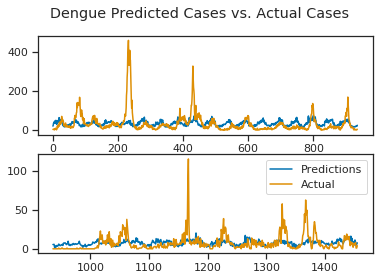

In [18]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
training_data_sj['fitted'] = sj_best_model.fittedvalues
training_data_sj.fitted.plot(ax=axes[0], label="Predictions")
training_data_sj.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
training_data_iq['fitted'] = iq_best_model.fittedvalues
training_data_iq.fitted.plot(ax=axes[1], label="Predictions")
training_data_iq.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [19]:
sj_predictions = sj_best_model.predict(test_data_sj).astype(int)
iq_predictions = iq_best_model.predict(test_data_iq).astype(int)

In [20]:
submission = pd.read_csv('data/submission_format.csv',
                         index_col=[0, 1, 2])

In [21]:
submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("submission_1.csv")